# Problem Set 2 (93 points)

# Problem 1 (QR algorithm) (22 pts)

###Theoretical proofs



1. Show that Hessenberg matrix preserves its structure under QR algorithm: if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well. **(5 pts)**

By defining equations of the eigenvalue QR-algorithm, we have:
$$A_k - \lambda I = QR$$
$$A_{k+1} - \lambda I = RQ$$
where $\lambda$ - eigenvalue of $A;$ $Q$ - unitary and $R$ - upper triangular
$$⇒ A_{k+1} = RQ + \lambda I = RQ + \lambda Q^{\top}Q = (IR + \lambda Q^{\top})Q = (Q^{\top}QR + \lambda Q^{\top})Q = Q^{\top} (QR + \lambda I)Q = Q^{\top} A_k Q$$
$$\text{Hence  } A_{k+1} = Q^{\top} A_k Q ⇔ A_k = QA_{k+1}Q^{\top}$$
Therefore, if $A_k$ hessenberg matrix then $A_{k+1}$ hessenberg as well

### Practical proofs

1. Implement function **Hessenberg_Transform** which takes a real square matrix $A$ and returns transformed matrix in Hessenberg form $H$ (use householder reflections). **(5 pts)**

In [ ]:
import numpy as np

In [ ]:
def Hessenberg_Transform(A):
  n = A.shape[0]
  for k in range(n-2):
    x = A[k+1:n, k] 
    norm_x = - np.linalg.norm(x)
    if x[0] < 0:
      norm_x = - norm_x
    u = np.zeros(len(x))
    u[0] = norm_x
    v =(u - x).reshape(len(x), 1)
    H = np.identity(len(x)) - 2 * np.dot(v, v.T) / np.dot(v.T, v)
    H_size = H.shape[0]
    H_final = np.zeros((n, n))
    I_size = n - H_size
    H_final[:I_size, :I_size] = np.identity(I_size)
    H_final[I_size:, I_size:] = H
    A = np.dot(H_final, A)
    A = np.dot(A, H_final)
    A = A.round(5)
  return A

In [ ]:
A = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 2], [1, 4, 9, 3]])
print("A = ", A)
H = Hessenberg_Transform(A)
print("H = ", H)

A =  [[1 2 3 4]
 [4 5 6 8]
 [7 8 9 2]
 [1 4 9 3]]
H =  [[ 1.      -4.06202  3.51131  0.41319]
 [-8.12404 15.77273 -4.54972  1.87242]
 [ 0.      -8.3608   2.04621  1.72985]
 [ 0.      -0.      -5.40946 -0.81894]]


2. Implement function **QR_givens** which takes a real square matrix in Hessenberg form $H$ and returns QR factorization: matrices $Q$ and $R$. **(5 pts)**

In [ ]:
def QR_givens(H):
  r, c = np.shape(H)
  Q = np.identity(r)
  R = np.copy(H)
  rows, cols = np.tril_indices(r, -1, c)
  for (row, col) in zip(rows, cols):
    if R[row, col] != 0:
      c = R[col, col]/np.hypot(R[col, col], R[row, col])
      s = -R[row, col]/np.hypot(R[col, col], R[row, col])
      G = np.identity(r)
      G[[col, row], [col, row]] = c
      G[row, col] = s
      G[col, row] = -s
      R = np.dot(G, R).round(5)
      Q = np.dot(Q, G.T).round(5)
  return Q, R

In [ ]:
Q, R = QR_givens(H)
print("Q = ",Q)
print("R = ",R)

Q =  [[ 0.12217 -0.24228  0.38227  0.88331]
 [-0.99251 -0.02982  0.04705  0.10873]
 [ 0.      -0.96975 -0.09695 -0.22403]
 [ 0.       0.      -0.91774  0.39717]]
R =  [[  8.18535 -16.15084   4.94461  -1.80792]
 [  0.        8.62163  -2.69935  -1.83347]
 [  0.        0.        5.8943    0.82992]
 [  0.        0.       -0.       -0.14424]]


3. Implement function **QR_algorithm**, which takes a real square matrix $A$ and returns $H_{N}$ - the result of $N$ iterations of QR algorithm. Use previously implemented **Hessenberg_Transform** to get Hessenberg form of matrix $A$, and  **QR_givens** to make QR factorization on each iteration. **(2 pts)**

In [ ]:
def QR_algorithm(A, N):
  H = Hessenberg_Transform(A)
  for i in range(N):
    Q, R = QR_givens(H)
    H = np.dot(R, Q)
  return H

In [ ]:
qr_alg = QR_algorithm(A, 5)
print(qr_alg)

[[20.35756928  0.82432803  1.10790706  2.79015   ]
 [-0.02960766 -0.5291487   5.33934415  2.15896   ]
 [ 0.         -3.70092764 -1.68561892  1.36744   ]
 [ 0.          0.          0.         -0.14267   ]]


4. Varing parameter $n$ generate random matrix of size $(n,n)$ and measure the computation time of **QR_algorithm** function. Plot observed data: computation time versus $n$. Use logarithmic scale for both axes. Explain obtained results.**(3 pts)**

Text(0, 0.5, 'time')

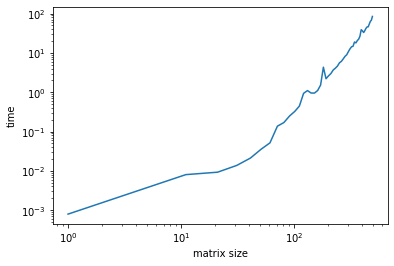

In [ ]:
import time
import matplotlib.pyplot as plt

y = list(range(1, 500, 10))
x = []
for i in range(1, 500, 10):
  A = np.random.rand(i, i)
  start_time = time.time()
  qr_alg = QR_algorithm(A, 5)
  end_time = time.time() - start_time
  x.append(end_time)
plt.yscale('log')
plt.xscale('log')
plt.plot(y, x)
plt.xlabel("matrix size")
plt.ylabel("time")

The size of the matrix lengthens the time it takes the method to complete the specified number of iterations.

5. Compare eigenvalues computed using your implemented algorithm and standard numpy functionality for some random matrix. Try different number of iterations for the algorithm. Explain results. **(2 pts)**

In [ ]:
for size in range(10, 100, 15):
  A = np.random.rand(size, size)
  np_eig = np.linalg.eig(A)
  np_eig_norm = np.linalg.norm(np_eig[0])
  x = []
  print(f'matrix size: {size}x{size}')
  for i in range(0, 500, 10):
    qr_alg = QR_algorithm(A, i)
    qr_eig = np.diagonal(qr_alg)
    qr_eig_norm = np.linalg.norm(qr_eig)
    diff = abs(np_eig_norm - qr_eig_norm)
    x.append(diff)
    if i%100 == 0:
      print(f'iteration {i} normed difference:', diff)

matrix size: 10x10
iteration 0 normed difference: 1.1919219365004752
iteration 100 normed difference: 0.0886144942086009
iteration 200 normed difference: 0.08872302732942661
iteration 300 normed difference: 0.09149063455839901
iteration 400 normed difference: 0.09598229733077979
matrix size: 25x25
iteration 0 normed difference: 3.9740662825882023
iteration 100 normed difference: 0.6358328859876021
iteration 200 normed difference: 0.43593092349488316
iteration 300 normed difference: 0.41889083208852007
iteration 400 normed difference: 0.429779273453871
matrix size: 40x40
iteration 0 normed difference: 6.336034406861357
iteration 100 normed difference: 0.9170425656463657
iteration 200 normed difference: 0.905864119400583
iteration 300 normed difference: 0.8477737827555814
iteration 400 normed difference: 0.7743968895535822
matrix size: 55x55
iteration 0 normed difference: 8.173453858471362
iteration 100 normed difference: 1.3823384173880946
iteration 200 normed difference: 1.302572839267

The larger the matrix, the more the errors and the longer it takes to iterate.

# Problem 2 (Stochastic trace estimation) (30 pts) 

In this problem we consider stochastic estimation of trace for implicitly-defined matrices.

Impicitly-defined matrices are such that matrix-vector multiplication is easy to perform, but matrix entries are not easy to obtain (examples are given by integral kernels, products of sparse matrices, products of a set of circulants, low-rank matrices given in a compressed form, etc).

In such cases it is often possible to approximate trace with $k\ll N$ matrix-vector products, where $N$ is the size of matrix.

One popular way to obtain stochastic estimate is Hutchinson algorithm.

## Hutchinson algorithm
Let $u$ be a random vector from $\mathbb{R}^{n}$ with independent identicaly distributed entries $u_i$ each having zero mean and variance $\sigma^2$.

Let $B$ be a symmetric matrix from $\mathbb{R}^{n\times n}$.

Hutchinson algorithm is roughly as follows:

    trace_estimate = 0
    for i=1:N do
        u = random_vector
        trace_estimate += (u,Bu)
    end do
    trace_estimate /= N

So Hutchinson algorithm uses empirical mean $u^\top B u$ as a trace estimation. Below we ask you to find properties of this estimator.

**Subproblem 1 (5 pts)**

1. Show that $\mathbb{E}\left[u^\top B u\right] = \sigma^2 \text{tr} B$, where $\mathbb{E}\left[\cdot\right]$ denotes average wrt $u$.

We have
$$ \mathbb{E}[u^{\top}Bu]= \mathbb{E}\bigg[\sum_{i}^n u_i^{\top}Bu_i\bigg] = \mathbb{E}\bigg[\sum_{i}^n u_i^{\top}e_i^{\top}Be_i u_i\bigg] = \mathbb{E}[u^{\top}u] \sum_{i}^ne_i^{\top}Be_i  = \sigma^2 \text{tr} B$$
where 
$$trB = \sum_{i=1}^ne_i^{\top}Be_i$$


2. Show that $\text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}B_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}B_{ii}^2$, where $\text{var}$ denotes [variance](https://en.wikipedia.org/wiki/Variance).

$$\mathbb{E}\left[(u^\top B u)^2\right] = \mathbb{E}
\bigg[\bigg(\sum_{i,j}u_ib_{ij}u_j\bigg)\bigg(\sum_{r,s}u_rb_{rs}u_s\bigg)\bigg] = \mathbb{E}
\bigg[\bigg(\sum_{i,j}\sum_{r,s}b_{ij}b_{rs}u_iu_ju_ru_s\bigg)\bigg] \\ = 2\sigma^4 \sum_{i\neq j}b_{ij}^2 + \sigma^4\sum_{i\neq j}b_{ii}b_{jj} + \mathbb{E}\left[u^4\right]\sum_{i}b_{ii}^2 $$
Since \\
$$(\mathbb{E}[u^\top B u])^2 = \sigma^4\sum_{i, j}b_{ii}b_{jj}$$
$$⇒ \text{var}\left[u^\top B u\right] = \mathbb{E}\left[(u^\top B u)^2\right] - (\mathbb{E}[u^\top B u])^2  = 2\sigma^4 \sum_{i\neq j}b_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}b_{ii}^2$$

3. Find the variance for the case when:

  a. each $u_{i}\sim \mathcal{N}(0, \sigma^2)$, i.e., for normally distributed with zero mean and variance $\sigma^2$;

  b. each $u_{i}$ follows [Rademacher distribution](https://en.wikipedia.org/wiki/Rademacher_distribution);

a) The probability density function of normally distribution is 
$$f(u) = \frac{1}{\sqrt{2\pi}\sigma}⋅\text{exp} \bigg[ -\frac{1}{2} \bigg( \frac{u-\mu}{\sigma}\bigg)^2\bigg]$$
$$\Rightarrow \text{var}[u] = ∫_{-∞}^{+∞}(u-\mu)^2 ⋅ \frac{1}{\sqrt{2\pi}\sigma} ⋅ \text{exp} \bigg[ -\frac{1}{2} \bigg( \frac{u-\mu}{\sigma}\bigg)^2\bigg] du $$
$$=\frac{1}{\sqrt{2\pi}\sigma}∫_{-∞}^{+∞}u^2 ⋅ \text{exp} \bigg[ -\frac{1}{2} \bigg( \frac{u}{\sigma}\bigg)^2\bigg] du \text{  (because } \mu = 0)$$
Substituting $u = \sqrt{2}\sigma x$
$$\text{var}[u] = \frac{1}{\sqrt{2\pi}\sigma}∫_{-∞}^{+∞}(\sqrt{2}\sigma x)^2 ⋅ \text{exp} \bigg[ -\frac{1}{2} \bigg( \frac{\sqrt{2}\sigma x}{\sigma}\bigg)^2\bigg] d(\sqrt{2}\sigma x) = \frac{2\sigma^2}{\sqrt{\pi}}∫_{-∞}^{+∞}x^2\cdot e^{-x^2} dx $$
Define $u = x^2 ⇒ du = 2xdx ⇒ dx = \frac{du}{2x} = \frac{du}{2\sqrt{u}}$
$$\text{var}[u] = \frac{2\sigma^2}{\sqrt{\pi}}∫_{0}^{+∞}u^{\frac{3}{2}-1}\cdot e^{-u} du $$
Using the gamma function's definition
$$Γ(x)=∫_{0}^{+∞}u^{x-1}\cdot e^{-u} du$$
So that
$$\text{var}[u] = \frac{2\sigma^2}{\sqrt{\pi}}Γ\bigg(\frac{3}{2}\bigg)=\frac{2\sigma^2}{\sqrt{\pi}}\cdot\frac{\sqrt{\pi}}{2} = \sigma^2 $$
$$⇒ \text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}b_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}b_{ii}^2 = 2\sigma^4 \sum_{i\neq j}b_{ij}^2 - (3-1) \sigma^4\sum_{i}b_{ii}^2 = 2 \sigma^4 \|B\|_F^2$$
where $\mathbb{E}\left[u^4\right]=\mathbb{E}\left[x^2\right] = \text{var}[x] + (\mathbb{E}[x])^2 =  \text{var}[x] + (\mathbb{E}[u^2])^2 = \text{var}[u^2] + (\text{var}[u]+\mathbb{E}[u]^2)^2 = 2\sigma^4 + 1\sigma^4 = 3\sigma^4$

b) The probability mass function of Rademacher distribution is
$$f(u)=\Bigg\{\begin{align*}
    1/2 \text{ if } u =-1\\
    1/2 \text{ if } u =+1\\
    0 \text{ otherwise }
\end{align*}$$
$$⇒ \Bigg\{\begin{align*}
   E[u] = -1\cdot \frac{1}{2} + 1\cdot \frac{1}{2} + 0 = 0 \\
   E[u^2] = (-1)^2\cdot \frac{1}{2} + 1^2\cdot \frac{1}{2} = 1; 
   E[u^4] = 1
\end{align*} $$
$$⇒ \sigma^2 = \text{var}[u] = E[u^2] - (E[u])^2 = 1$$
$$⇒ \text{var}\left[u^\top B u\right] = 2\sigma^4 \sum_{i\neq j}b_{ij}^2 + \left(\mathbb{E}\left[u^4\right] - \sigma^4\right)\sum_{i}b_{ii}^2 = 2 \sum_{i\neq j}b_{ij}^2 = 2 \bigg(\|B\|_F^2- \sum_{i=1}^n B_{ii}^2\bigg)$$

4. Why variance matters.
  
  Let $z_1, \dots, z_N$ are independent identicaly distributed samples of random variable with mean $\mu$ and variance $\sigma^2$ and $\hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} z_{i}$ is a standard Monte Carlo extimator for mean.

  a. Show that $\mathbb{E}\left[\hat{\mu}\right] = \mu$ and $\text{var}\left[\hat{\mu}\right] = \sigma^2 \big/ N$.

  b. Use [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality) to find the number of samples $N$ you need to use to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$.

a) $$\mathbb{E}\left[\hat{\mu}\right] = \mathbb{E}\left[\frac{1}{N}\sum_{i=1}^{N} z_{i}\right] = \frac{1}{N} \mathbb{E}\left[\sum_{i=1}^{N} z_{i}\right] = \frac{1}{N} \bigg(\sum_{i=1}^{N}\mathbb{E}[z_i] \bigg) = \frac{1}{N} N\mu = \mu$$
$$\text{var}\left[\hat{\mu}\right] = \frac{1}{N^2}\text{var}\bigg[\sum_{i=1}^{N} z_{i} \bigg] = \frac{1}{N^2}\sum_{i=1}^{N}\text{var}[z_{i}] = \frac{\sigma^2 N} {N^2} = \frac{\sigma^2} {N}$$
b) Then, using the Chebyshev inequality, we get
$$P(|\hat{\mu} - \mu| \geq \epsilon) \leq \frac{\sigma^2} {N\epsilon^2}$$
The right hand goes to 0 has $n → ∞$ \\
With probability $\delta$, then
$$\delta \geq \frac{\sigma^2} {N\epsilon^2}$$
$$ ⇒ N \geq \frac{\sigma^2} {\delta\epsilon^2}$$
Therefore, the number of samples $N$ to guarante that estimate $\hat{\mu}$ deviates from $\mu$ on $\epsilon\ll 1$ with probability at most $\delta\ll 1$ is
$ N \geq \frac{\sigma^2} {\delta\epsilon^2}$


5. Does the variance of the estimator matters?

  a. Adapt bounds from _Subproblem 1 point 4.b_ for Hutchinson algorithm with normal and Rademacher distributions.

  b. Empirically evaluate variances from _Subproblem 1 point 2_ using several sparse, low-rank and circulant matrices.

  c. Comment on practicality of Chebyshev bounds. What is the number of iterations you need to perform to achieve reasonably small error with reasonably large probability according to this bound?

a.1) With normal distribution: The Gaussian estimator $tr_{G}^N(B) = \frac{1}{N}\sum_{i=1}^{N} u_{i}^{\top} B u_i$ is an $(ϵ,\delta)-$ approximator of $tr(B)$ for $N \geq 8ϵ^{-2}ln(\frac{2}{\delta})$ \\
Proof. B is symmetric so B can be diagonalized as $B = U^{\top}ΛU, N $ random vector $u_i, i=1,...,N$, whose components are i.i.d. and drawn from normal distribution. Define $z_i=Uu_i$. Because $U$ is orthogonal, $z_i$ are i.i.d Gaussian random variables. \\
Markov's inequality asserts that
$$P(tr_{G}^N(B) \leq (1-ϵ)tr(A)) = P\bigg(\sum_{i=1}^N\sum_{j=1}^r\lambda_jz_{ij}^2 \leq N(1-ϵ)tr(B)\bigg) \leq \text{exp}\{tN(1-ϵ)tr(B)\}\mathbb{E}\bigg(\text{exp}\bigg\{\sum_{i=1}^N\sum_{j=1}^r-t\lambda_jz_{ij}^2\bigg\}\bigg) \\ \leq \text{exp}\{tN(1-ϵ)tr(B)\}\prod_{i=1}^N\prod_{j=1}^r\mathbb{E}\bigg(\text{exp}\{-t\lambda_jz_{ij}^2\}\bigg) $$
Here $\text{exp}\{-t\lambda_jz_{ij}^2\} = (1 + 2\lambda_jt)^{-\frac{1}{2}}$, because $z_{ij}^2$ is a $\chi^2$ random variable of degree 1.
$$⇒ P(tr_{G}^N(B) \leq (1-ϵ)tr(A)) \leq \text{exp}\{(tN(1-ϵ)tr(B)\}\prod_{j=1}^r (1 + 2\lambda_jt)^{-\frac{N}{2}} \leq \text{exp}\{(tN(1-ϵ)tr(B)\}\prod_{j=1}^r (1 + 2\lambda_jt)^{-\frac{N}{2}} $$
$$ \forall x: 0 \leq x \leq \frac{1-\alpha}{\alpha} \text{ where } 0 < α < 1$$
$$ln(1+x) \geq \alpha x$$
$$\text{Set } \alpha = 1- \frac{ϵ}{2}, t \leq \frac{1 - \alpha}{2\alpha\|A\|} ⇒ (1 + 2\lambda_jt) > \text{exp}\{2\alphaλ_j\}t \text{ so that}$$
$$P(tr_{G}^N(B) \leq (1-ϵ)tr(A)) \leq \text{exp}\{(tN(1-ϵ)tr(B)\}\prod_{j=1}^r \text{exp}(-N\alphaλ_jt) = \text{exp}\{(tN(1-ϵ-\alpha)tr(B)\} $$
We want the right hand side to be bounded by $\delta /2$, i.e. 
$$N \geq \frac{ln(\frac{2}{\delta})}{(\alpha-(1 -ϵ))tr(B)t} = \frac{2ϵ^{-1}ln(\frac{2}{\delta})}{tr(B)t}$$
where $t \leq \frac{1-\alpha}{2\alpha\|B\|}$.
Set $t = \frac{1-\alpha}{2\alpha\|B\|} = \frac{ϵ}{2(2-ϵ)\|B\|}$
$$⇒ N \geq 4(2-ϵ)ϵ^{-2}ln(\frac{2}{\delta})\frac{\|B\|}{tr(B)}\geq 8ϵ^{-2}ln(\frac{2}{\delta})$$
So $$P(tr_{G}^N(B) \leq (1-ϵ)tr(A)) \leq \frac{\delta}{2}$$


a.2) With Rademacher distribution: The Hutchinson estimator $tr_{H}^N(B) = \frac{1}{N}\sum_{i=1}^{N} u_{i}^{\top} B u_i$ is an $(ϵ,\delta)-$ approximator of $tr(B)$ for $N \geq 6ϵ^{-2}ln(\frac{2}{\delta})$ \\
Proof. B is symmetric so B can be diagonalized as $B = U^{\top}ΛU, N $ random vector $u_i, i=1,...,N$, whose components are i.i.d. and drawn from Rademacher distribution. Define $z_i=Uu_i$. Markov's inequality asserts that \\
$$P(tr_{H}^N(B) \leq (1-ϵ)tr(A)) = P\bigg(\frac{1}{N} \sum_{i=1}^{N} u_{i}^{\top} B u_i \leq (1-ϵ)tr(B) \bigg) = P\bigg(\frac{1}{N} \sum_{i=1}^{N} z_{i}^{\top} Λ z_i \leq (1-ϵ)tr(B) \bigg) = P\bigg(\sum_{i=1}^{N}\sum_{j=1}^{r} λ z_{ij}^2 \leq N(1-ϵ)tr(B) \bigg) = P\bigg(\sum_{j=1}^{r} \frac{λ}{tr(B)}\sum_{i=1}^{N} z_{ij}^2 \leq N(1-ϵ) \bigg) \leq \text{exp} \{tN(1-ϵ)\}\mathbb{E} \bigg( \text{exp} \{ \sum_{j=1}^r \frac{λ_j}{tr(B)}\sum_{i=1}^{N}-tz_{ij}^2\} \bigg) \\
\leq \text{exp} \{tN(1-ϵ)\}\sum_{j=1}^r \frac{λ_j}{tr(B)}\mathbb{E}\bigg(\text{exp} \{\sum_{i=1}^{N}-tz_{ij}^2\} \bigg) \\
= \text{exp} \{tN(1-ϵ)\}\sum_{j=1}^r \frac{λ_j}{tr(B)}\mathbb{E}\bigg(∏_{i=1}^N\text{exp}\{-tz_{ij}^2\} \bigg) \\
= \text{exp} \{tN(1-ϵ)\}\sum_{j=1}^r \frac{λ_j}{tr(B)}∏_{i=1}^N \mathbb{E} (\text{exp}\{-tz_{ij}^2\})$$
We want the right hand side to be bounded by $\delta /2$.
Let $t = \frac{ϵ}{2(1+ϵ)}$
$$\text{exp} \{tN(1-ϵ)\}∏_{i=1}^N \mathbb{E} (\text{exp}\{-tz_{ij}^2\}) < \text{exp}\bigg\{-\frac{N}{2}\bigg(\frac{ϵ^2}{2} - \frac{ϵ^3}{3} \bigg)\bigg\}$$
$$ \text{If } N \geq 6ϵ^{-2}ln(\frac{2}{\delta}) \text{ then } \text{exp}\bigg\{-\frac{N}{2}\bigg(\frac{ϵ^2}{2} - \frac{ϵ^3}{3} \bigg)\bigg\} < \frac{\delta}{2} $$
So $$P(tr_{H}^N(B) \leq (1-ϵ)tr(A)) \leq \frac{\delta}{2}$$


**Subproblem 2 (5 pts)**

  1. Implement Hutchinson algorithm for normal and Rademacher distributions.

In [ ]:
def Hutchinson(A, n, type):
  trace_estimate = 0
  for i in range(n):
    if type == "normal": 
      u =  np.random.normal(0, 1, A.shape[0]).reshape((-1,)) 
    elif type == "Rademacher":
      u = (np.random.rand(A.shape[0])<0.5)*2-1
    trace_estimate += u.dot(A @ u)
  trace_estimate /= n
  return trace_estimate

2. Evaluate your algorithm on several matrices on your choice.

In [ ]:
for i in range(5):
  size = np.random.randint(1,1000)
  print(f'random {size}x{size} matrix')
  A = (A + A.T)/2 
  print('np trace:', np.trace(A))
  print('Hutchinson normal trace:', Hutchinson(A, 1000,"normal"))
  print('Hutchinson Rademacher trace:', Hutchinson(A, 1000,"Rademacher"))

random 552x552 matrix
np trace: 43.93497580481928
Hutchinson normal trace: 44.34170966950821
Hutchinson Rademacher trace: 47.401203676083604
random 836x836 matrix
np trace: 43.93497580481928
Hutchinson normal trace: 39.38921901062171
Hutchinson Rademacher trace: 42.763046967109126
random 481x481 matrix
np trace: 43.93497580481928
Hutchinson normal trace: 45.212459703847536
Hutchinson Rademacher trace: 42.97978233440084
random 682x682 matrix
np trace: 43.93497580481928
Hutchinson normal trace: 46.84686782651752
Hutchinson Rademacher trace: 44.245607769673114
random 28x28 matrix
np trace: 43.93497580481928
Hutchinson normal trace: 42.164962886158186
Hutchinson Rademacher trace: 42.35365413743254


**Subproblem 3 (5 pts)**

Is it possible to obtain better bound? Here we study how to do that for simplified case.

Let $A$ be the $N\times N$ matrix with all entries equal one, i.e., $A_{ij}=1$. We consider variant of Hutchinson algorithm with standard normal variables, i.e., $u_{i} \sim \mathcal{N}(0, 1)$.


1. Show that $u^\top A u \big/ N$ has [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution).

2. Suppose that Hutchinson algorithm is applied for $M$ iteration. Show that $\sum_{i=1}^{M}u_i^\top A u_i \big/ N$ has $\chi^2(M)$ distribution (chi-squared distribution with $M$ degrees of freedom).

3. Let $M\geq50$, $G_{M} = \sum_{i=1}^{M}u_i^\top A u_i \big/ M$ and suppose that $\chi^2(M)$ has approximately normal distribution. Under this assumptions show that there exists small $\delta$ such that $\text{Pr}\left(\left|G_{M} - \text{tr}(A)\right| \leq \epsilon \text{tr}(A)\right) \geq 1 - \delta $.

It is possible to generalize bound from Subproblem 3 point 3 and the result can be found in the paper by Avron and Toledo (2010).

---

Another similar bound that we state without a proof involves Frobenius norm.

For Hutchinson estimate with $l$ steps denoted $T_l$, $\delta \in (0, 1/2]$ for fixed constants $c$ and $C$

\begin{equation}
  \text{Pr}\left(\left|T_{l} - \text{tr}(A)\right|\leq C \sqrt{\frac{\log(1/\delta)}{l}}\left\|A\right\|_{F}\right) \geq 1 - \delta.
\end{equation}

## Improved Hutchinson algorithms

There are a lot of improved version of Hutchinson algorithms.

One fruitful idea is to represent the matrix $A$ as a sum $A = A_1 + A_2$ in such a way that $A_1$ has easy-to-compute trace and $\left\|A_2\right\|_F^2 \ll \left\|A_1\right\|_F^2$ or $\text{tr}(A_2) \ll \text{tr}(A_1)$ if both $A_1$ and $A_2$ are spd matrices.

If this splitting is possible to construct, one has smaller one-sample variance or better $(\epsilon, \delta)$-estimator.

Below we ask you to prove simple theoretical result on the systematic construction of such splittings.

**Subproblem 4 (5 pts)**

Let $A\in\mathbb{R}^{N\times N}$ be symmetric positive definite matrix and $Q\in\mathbb{R}^{N\times k}$ contains $k$ eigenvalues corresponding to top $k$ eigenvalues, i.e., $\lambda_1 \leq \lambda_2\leq\dots\leq \lambda_k\leq\lambda_{k+1}\leq \dots \leq \lambda_{N}$ eigenvalues are ordered and $Q_{\star 1}, \dots Q_{\star k}$ are eigenvectors with eigenvalues $\lambda_{N-k},\dots,\lambda_{N}$.

1. Show that $\text{tr}\left(A\right) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$.

---



Via the stochastic trace estimator, estimating $\text{tr}(A - QQ^TA) = \text{tr}\left((I - QQ^T)A (I - QQ^T)\right) $
$$⇒ \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right) = \text{tr}\left (Q Q^T A\right)+\text{tr}(A- QQ^TA) = \text{tr}(Q Q^T A + A- QQ^TA) = \text{tr}(A)$$
Thus $\text{tr}(A) = \text{tr}\left(Q^T A Q\right) + \text{tr}\left((I - QQ^T)A (I - QQ^T)\right)$

2. Show that $\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$.

We have algorithm's estimate error:
$$\left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} = \|A - A_k\|_{F} $$
Since $$\|A-A_k\|_F^2=\sum_{i=k+1}^N\lambda_i^2\leq\lambda_{k+1}\sum_{i=k+1}^N\lambda_i\leq\frac{1}{k}\text{tr}(A)\sum_{i=k+1}^N\lambda_i\leq\frac{1}{k}\text{tr}(A)^2  ~~~~(*)$$
$$⇒ \left\|(I - QQ^T)A (I - QQ^T)\right\|_{F} \leq \frac{1}{\sqrt{k}}\text{tr}\left(A\right)$$

3. Show that for any spd matrix $\left\|A\right\|_{F} \leq \text{tr}(A)$.

From $(*)$, for $k=1:$
$$\|A-A_1\|_F^2\leq\text{tr}(A)^2 ⇒ \|A-A_1\|_F \leq \text{tr}(A) $$ 

4. Use 2. and 3. and the bound for Hutchinson algorithm with Frobenius norm above to show that if $k \simeq 1/\epsilon$ one only needs $l\simeq 1/\epsilon$ steps in place of $1/\epsilon^2$ for a given tolerance.

The simple analysis above suggests the following improved Hutchinson algorithm:

    trace_estimate = 0
    Q = []
    for i=1:m/3 do
        u = random_vector
        Q = [Q, u] # stack vectors
    end do
    Q = orthonormal basis for columns of AQ
    tr_1 = trace(Q^T A Q) # compute exactly
    tr_2 = approximate tr(I - QQ^T)A(I - QQ^T) with Hutchinson algorithm m/3 steps
    tr = tr_1 + tr_2


Observe that we substituted true eigenvalues with orthonormal basis. You may consider this a one-sweep power estimation of eigenvalues.

**Subproblem 5 (5 pts)**

1. Implement improved Hutchinson algorithm. Note that the "algorithm" above is rather sketchy. Make sure to introduce improvements where needed.

In [ ]:
def impr_Hutchinson(A, m):
  for i in range(1, int(m/3)):
    M = np.random.randint(-1,1,(A.shape[1], (int(m/3))))
    Q,R = np.linalg.qr(A@M)
  I = np.eye(A.shape[0])
  Q1 = I - Q@Q.T
  trace1 = np.trace(Q.T@A@Q)
  trace2 = Hutchinson(Q1.T@A@Q1, int(m/3), "normal")
  return trace1 + trace2

2. Evaluate you algorithm on several matrices on your choice.

In [ ]:
for i in range(5):
  size = np.random.randint(1,1000)
  print(f'random {size}x{size} matrix')
  A = np.random.rand(size, size)
  A = (A + A.T)/2 + np.eye(size)
  print('np trace:', np.trace(A))
  print('Improved Hutchinson:', impr_Hutchinson(A, 100))

random 381x381 matrix
np trace: 573.950215313568
Improved Hutchinson: 595.7083474412915
random 681x681 matrix
np trace: 1011.1603614977085
Improved Hutchinson: 959.6901266075283
random 188x188 matrix
np trace: 284.2015419945463
Improved Hutchinson: 291.97284379339345
random 990x990 matrix
np trace: 1488.8211222429127
Improved Hutchinson: 1517.7669125013178
random 365x365 matrix
np trace: 544.8157520448882
Improved Hutchinson: 554.6110114432807


## Comparison of Hutchinson and improved Hutchinson algorithms

**Subproblem 6 (5 pts)**

Produce plots y-axis = relative trace error estimation, x-axis = number of matrix-vector products for original Hutchinson algorithm and for the improved version for the following cases:

1. Random matrices on your choise. Suggestions: [randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html), [random sparse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random.html).

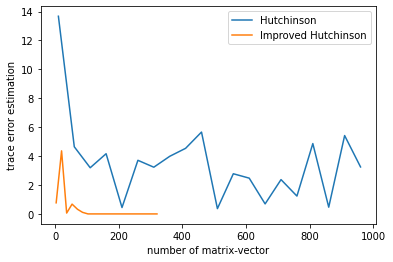

In [ ]:
size = 100
A = np.random.rand(size,size)
x1, x2, y1, y2 = [], [], [], []
for n in range(10, 1000, 50):
  x1.append(n)
  x2.append(int(n/3))
  y1.append(np.abs(Hutchinson(A, n,"normal")-np.trace(A)))
  y2.append(np.abs(impr_Hutchinson(A, n)-np.trace(A)))

plt.xscale('linear')
plt.yscale('linear')
plt.plot(x1, y1, label='Hutchinson')
plt.plot(x2, y2, label='Improved Hutchinson')
plt.xlabel('number of matrix-vector')
plt.ylabel('trace error estimation')
plt.legend(loc='best')

2. For random spd matrices with eigenvalues $\lambda_i = i^{-\alpha}$ for several $\alpha$, i.e., for matrices with fast- and slow-decaying spectrum.

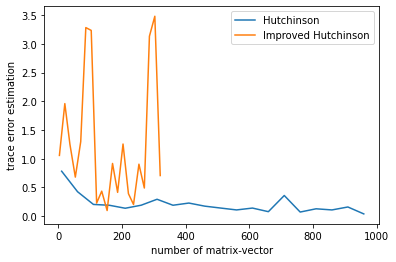

In [ ]:
eig_value = []
for alp in range(5):
  eig_value.append((1j) ** (-alp))
n = len(eig_value)
S = np.diag(eig_value)
Q, R = np.linalg.qr(np.random.rand(n, n))
spd_matrix = Q.T @ S @ Q
x1, x2, y1, y2 = [], [], [], []
for n in range(10, 1000, 50):
  x1.append(n)
  x2.append(int(n/3))
  y1.append(np.abs(Hutchinson(spd_matrix, n,"normal")-np.trace(spd_matrix)))
  y2.append(np.abs(impr_Hutchinson(spd_matrix, n)-np.trace(spd_matrix)))

plt.xscale('linear')
plt.yscale('linear')
plt.plot(x1, y1, label='Hutchinson')
plt.plot(x2, y2, label='Improved Hutchinson')
plt.xlabel(r'number of matrix-vector')
plt.ylabel(r'trace error estimation')
plt.legend(loc='best')

3. Summarize your observations.

For random real matrices, the trace of improved Hutchinson approach converges faster than the normal one. For random spd matrices, the opposite is true, the normal Hutchinson approach converges when the improved Hutchinson diverges.

# Problem 3 (Universal adversarial attacks) (18 pts) 

## Intro

Suppose we have some classification model $f: X \to Y$ which takes vector $x \in \mathbb{R^n}$ and output some label $y$. It appears that deep neural networks are valunable to small imperceptible perturbations called adversarial attacks. Formally, an adversarial attack is the verctor $\varepsilon \in \mathbb{R^n}$ that leads to misclassification: $y(x) \neq y(x + \varepsilon)$.

<img src="https://openai.com/content/images/2017/02/adversarial_img_1.png" style="display=block; margin:auto">

However, it was shown that there exist universal adversarial perturbations: $\varepsilon \in \mathbb{R^n}$ that leads to misclassification $y(x) \neq y(x + \varepsilon)$ for most of inputs.

The hypetesis is that perturbation of a hidden layer caused by an attack will propagate further in the network changing predicted label of x.

Let $f_i$ be the output of $i$-s hidden layer, then
$$f_i(x + \varepsilon) - f(x) \approx J_i(x)\varepsilon$$
So, to find attack we need to solve the folliwing optimization problem
$$
\max_{\|\varepsilon\|_p = 1} \sum\limits_{x \in \text{batch}}\|J_i(x)\varepsilon\|_q^q
$$




In [38]:
import torch
import torch.nn as nn
import requests

In [ ]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)


def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None


def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
class CifarNet(nn.Module):
    def __init__(self):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3)

        self.pool = nn.MaxPool2d(2, 2)

        self.relu = nn.ReLU(inplace=True)
        self.fc1 = nn.Linear(3200, 256)
        
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 3200)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_id = "1qrNvr3eLYjvbkVg5jY2sYA2rqK9XkTXs"
download_file_from_google_drive(file_id, "./cifar_checkpoint.pth")

model = CifarNet().to(device)
model.load_state_dict(torch.load("./cifar_checkpoint.pth", map_location="cpu"))

<All keys matched successfully>

## Problem discription

+ Obtain fixed point iteration to solve the problem above using first order optimality condition. **(5 pts)**

Method Fast Gradient Sign Attack (FGSM) - the attack uses the gradient of the loss w.r.t the input data, then adjusts the input data to maximize the loss. \\
We can define the function that creates the adversarial examples by perturbing the original inputs. The fgsm_attack function takes three inputs, image is the original clean image $(x)$, epsilon is the pixel-wise perturbation amount $(\epsilon)$, and data_grad is gradient of the loss w.r.t the input image $(∇_x J(θ,x,y)).$  \\
$$\text{perturbed_image}=\text{image}+\epsilon \cdot sign(\text{data_grad})=x+ϵ\cdot sign(∇_xJ(θ,x,y))$$
Finally, in order to maintain the original range of the data, the perturbed image is clipped to range [0,1].

+ Suppose additionally that $\varepsilon$ should be sparse: $\|\varepsilon\|_0 \leq k$. Correct the algorithm above using additional truncation operator. **(5 pts)**


In [46]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [42]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = datasets.CIFAR10('./data', train=False, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False, num_workers=1)

Files already downloaded and verified


In [57]:
for X,y in trainloader:
    X,y = X.to(device), y.to(device)
    break
def fgsm(model, X, y, epsilon):
    delta = torch.zeros_like(X, requires_grad=True)
    loss = nn.CrossEntropyLoss()(model(X + delta), y)
    loss.backward()
    return epsilon * delta.grad.detach().sign()
def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N,M*1.3))
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].cpu().numpy(), cmap="gray")
            title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

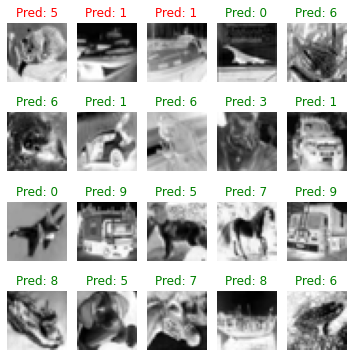

In [61]:
### Illustrate original predictions
yp = model(X)
plot_images(X, y, yp, 4, 5)

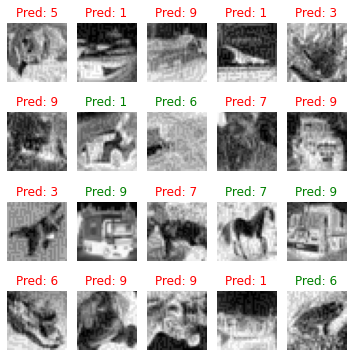

In [62]:
### Illustrate attacked images
val = torch.ones_like(X)
delta = fgsm(model, X, y, 0.1)
yp = model(X + delta)
plot_images(X + delta, y, yp, 4, 5)

+ Implement algorithms 1 and 2. Find universal perturbations on CIFAR dataset using random batch of size 64. Report fooling rate depending on hyperparameters **(8 pts)**
$$
\text{FoolingRate} = \frac{1}{N}\sum\limits_{i = 1}^N \mathbb{1}[y(x + \varepsilon) \neq y(x)]
$$

In [58]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        loss = nn.CrossEntropyLoss()(yp,y)
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

In [63]:
print("Fooling Rate = ", epoch_adversarial(model, trainloader, fgsm, 0.1)[0])

Fooling Rate =  0.7595


# Problem 4 (Image restoration) (23 pts) 

Image restoration is the task where we need to eliminate blurring and some random noise to get ideal image. Practically, images obtained in real life could be represented in following way:

$$g = f * h + n$$

where $g$ - obtained image of size $(N,N)$, $h$ - blur kernel of size $(3,3)$, $n$ - an additive zero-mean Gaussian white noise, and $f$ - ideal image (deblurred and denoised). In our work we will use gaussian blur kernel with window size 3:

$$h = \frac{1}{16}\begin{pmatrix}1 & 2 & 1\\ 2 & 4 & 2\\ 1 & 2 & 1\end{pmatrix}$$

Here $f*h$ is a 2-d convolution of ideal image with blur kernel, which could be rewritten in matrix format:

$$f * h = H \mathrm{vec}(f)$$

where $H$ - block Toeplitz with Toeplitz blocks matrix which corresponds to 2-d convolution with kernel $h$, $\mathrm{vec}(\cdot)$ - operation of vectorization.

So, let us write the task of finding $f$ as optimization problem:

$$\min\limits_{f,u} \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}}$$
where $\|u\|_{\mathrm{TV}} = \sum\limits_{1\leq j,k\leq N}\|\nabla u_{j,k}\|_2 = \sum\limits_{1\leq j,k\leq N}\sqrt{(u_{j+1,k}-u_{j,k})^2 + (u_{j,k+1}-u_{j,k})^2}$ here we calculate gradients (pixel differences) along **x** and **y** image dimensions.

One can notice that problem could be splitted on two:

$$\min\limits_{u}\min\limits_f \{\|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u)\|_2^2\} + \alpha_2\|u\|_{\mathrm{TV}}$$

To find the solution we will use iterative method:

$$\begin{cases}
f^{(i)} = \arg\min\limits_f \|H\mathrm{vec}(f) - \mathrm{vec}(g)\|_2^2 + \alpha_1\|\mathrm{vec}(f-u^{(i-1)})\|_2^2 & (a)\\
u^{(i)} = \arg\min\limits_u \alpha_1\|\mathrm{vec}(f^{(i)}-u)\|_2^2 + \alpha_2\|u\|_{\mathrm{TV}} & (b)
\end{cases}$$

Taking matrix derivative over the minimization functional in subproblem **(a)** we get the system:

$$(H^TH + \alpha_1I)\mathrm{vec}(f) = H^T\mathrm{vec}(g+\alpha_1u^{(i-1)})$$

This system can be solved by conjugate gradient method. Also, taking into account that $H$ is block Toeplitz with Toeplitz blocks (BTTB), we can make fast matrix by vector multiplication.

The subproblem **(b)** could be solved by using any kind of solver of your choice.

**So, your task is to:**

1. Implement creation and fast matrix by vector multiplication for matrix $H$ **(6 pts)**
2. Implement solver for subproblem **(a)** based on conjugate gradient descent using fast matrix by vector multiplication for $H$. **(8 pts)**
3. Implement some solver for subproblem **(b)** **(3 pts)**
4. Implement iterative solver for the total problem using solvers for subproblems **(a)** and **(b)** **(3 pts)**
5. Blur (use defined blurring kernel) given image and add gaussian noise with zero mean and some variance (up to you). Try to restore the image, compare the result with the original one. Make a conclusion. **(3 pts)**


In [64]:
from PIL import Image, ImageOps

In [79]:
!wget --no-check-certificate \
    "https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true" \
    -O "/lena.png"

--2022-12-11 12:38:23--  https://github.com/oseledets/nla2022/blob/main/hw2/lena.png?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/oseledets/nla2022/raw/main/hw2/lena.png [following]
--2022-12-11 12:38:23--  https://github.com/oseledets/nla2022/raw/main/hw2/lena.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png [following]
--2022-12-11 12:38:23--  https://raw.githubusercontent.com/oseledets/nla2022/main/hw2/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20329 (

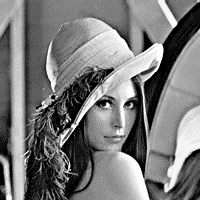

In [80]:
orig_image = ImageOps.grayscale(Image.open("/lena.png"))
orig_image

In [82]:
def mult(H, x):
  n = len(H[0])
  row = H[0]
  col = H[:, 0]
  first_el = row[0]
  row = row[::-1][:-1]
  row = np.insert(row, 0, first_el, axis=0)
  a_2n = np.concatenate([col, row])
  pad_size = len(a_2n) - len(x)
  x_pad = np.pad(x, (0, pad_size), mode='constant')
  y = np.fft.fft(x_pad.T)
  v = np.fft.fft(a_2n.T)
  u = np.multiply(v, y)
  inv_u = np.fft.ifft(u)
  return(inv_u[:n])